In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
import api_keys
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

#DataFrame
LatLon = pd.DataFrame({"Latitude":lats,"Longitude":lngs})        
print(LatLon.head())

# For the selected coordinates, use citipy to associate them with nearest city.

LatLon["Closest City name"] = ""
LatLon["Closest Country code"] = ""
for index,row in LatLon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    LatLon.set_value(index,"Closest City name",city.city_name)
    LatLon.set_value(index,"Closest Country code",city.country_code.upper())
# Per Instruction, There has to be at least 500 unique (non-repeat) cities 

# Remove any duplicate cities

ULatLon = LatLon.dropna()
ULatLon = ULatLon.drop_duplicates()

# Picking a sample of 666 cities to proceed with analysis
SampCities = ULatLon.sample(666)
SampCities =SampCities.reset_index()
SampCities = SampCities.iloc[:,[3,4]]
SampCities.head()

574
    Latitude   Longitude
0  37.085360   62.101667
1 -35.097220  119.050367
2 -58.960247 -178.775457
3   4.468268  162.221181
4 -18.933831  -38.646329


C:\Users\pride\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pride\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel\__main__.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Closest City name,Closest Country code
0,plettenberg bay,ZA
1,khatanga,RU
2,rikitea,PF
3,ekibastuz,KZ
4,ushuaia,AR


## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :api_key,"units":"imperial" }
print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

# loop throught the Cities and append them to a dataframe
for index,row in SampCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SampCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()

    SampCities.set_value(index,"Latitude",CWRespJson.get("coord",{}).get("lat"))
    SampCities.set_value(index,"Longitude",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Temperature",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Max Temp",CWRespJson.get("main",{}).get("temp_max"))
    SampCities.set_value(index,"Wind speed",CWRespJson.get("wind",{}).get("speed"))
    SampCities.set_value(index,"Humidity",CWRespJson.get("main",{}).get("humidity"))
    SampCities.set_value(index,"Cloudiness",CWRespJson.get("clouds",{}).get("all"))
    SampCities.set_value(index,"Date",CWRespJson.get("dt"))


print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

#Sample Json Response
#{"coord":
#{"lon":145.77,"lat":-16.92},
#"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],
#"base":"cmc stations",
#"main":{"temp":293.25,"pressure":1019,"humidity":83,"temp_min":289.82,"temp_max":295.37},
#"wind":{"speed":5.1,"deg":150},
#"clouds":{"all":75},
#"rain":{"3h":3},
#"dt":1435658272,
#"sys":{"type":1,"id":8166,"message":0.0166,"country":"AU","sunrise":1435610796,"sunset":1435650870},
#"id":2172797,
#"name":"Cairns",
#"cod":200}

-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 666 | for City,Country: plettenberg bay,ZA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=plettenberg+bay%2CZA


C:\Users\pride\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pride\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pride\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pride\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pride\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\ipykernel\__main__.py

Processing Record 2 of 666 | for City,Country: khatanga,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=khatanga%2CRU
Processing Record 3 of 666 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=rikitea%2CPF
Processing Record 4 of 666 | for City,Country: ekibastuz,KZ
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=ekibastuz%2CKZ
Processing Record 5 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=ushuaia%2CAR
Processing Record 6 of 666 | for City,Country: norman wells,CA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=norman+wells%2CCA
Processing Record 7 of 666 | for City,Country: muros,ES
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=samusu%2CWS
Processing Record 51 of 666 | for City,Country: haapiti,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=haapiti%2CPF
Processing Record 52 of 666 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=busselton%2CAU
Processing Record 53 of 666 | for City,Country: saskylakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=saskylakh%2CRU
Processing Record 54 of 666 | for City,Country: constitucion,MX
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=constitucion%2CMX
Processing Record 55 of 666 | for City,Country: port alfred,ZA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=p

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=ribeira+grande%2CPT
Processing Record 97 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=ushuaia%2CAR
Processing Record 98 of 666 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=punta+arenas%2CCL
Processing Record 99 of 666 | for City,Country: conceicao da barra,BR
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=conceicao+da+barra%2CBR
Processing Record 100 of 666 | for City,Country: bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=bredasdorp%2CZA
Processing Record 101 of 666 | for City,Country: nikolskoye,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=arraial+do+cabo%2CBR
Processing Record 143 of 666 | for City,Country: sentyabrskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=sentyabrskiy%2CRU
Processing Record 144 of 666 | for City,Country: ouango,CF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=ouango%2CCF
Processing Record 145 of 666 | for City,Country: tasiilaq,GL
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=tasiilaq%2CGL
Processing Record 146 of 666 | for City,Country: belushya guba,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=belushya+guba%2CRU
Processing Record 147 of 666 | for City,Country: melchor de mencos,GT
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635e

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=belushya+guba%2CRU
Processing Record 190 of 666 | for City,Country: saldanha,ZA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=saldanha%2CZA
Processing Record 191 of 666 | for City,Country: chagda,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=chagda%2CRU
Processing Record 192 of 666 | for City,Country: sergeyevka,KZ
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=sergeyevka%2CKZ
Processing Record 193 of 666 | for City,Country: takaka,NZ
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=takaka%2CNZ
Processing Record 194 of 666 | for City,Country: myitkyina,MM
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=myitk

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=camaguey%2CCU
Processing Record 237 of 666 | for City,Country: tuktoyaktuk,CA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=tuktoyaktuk%2CCA
Processing Record 238 of 666 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=hobart%2CAU
Processing Record 239 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=ushuaia%2CAR
Processing Record 240 of 666 | for City,Country: hithadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=hithadhoo%2CMV
Processing Record 241 of 666 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=kapaa%2C

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=leningradskiy%2CRU
Processing Record 285 of 666 | for City,Country: tura,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=tura%2CRU
Processing Record 286 of 666 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=kapaa%2CUS
Processing Record 287 of 666 | for City,Country: tessalit,ML
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=tessalit%2CML
Processing Record 288 of 666 | for City,Country: davila,PH
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=davila%2CPH
Processing Record 289 of 666 | for City,Country: samalaeulu,WS
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=samalaeulu%2CWS
Pr

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=hermanus%2CZA
Processing Record 335 of 666 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=cape+town%2CZA
Processing Record 336 of 666 | for City,Country: avarua,CK
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=avarua%2CCK
Processing Record 337 of 666 | for City,Country: san ramon,BO
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=san+ramon%2CBO
Processing Record 338 of 666 | for City,Country: yerofey pavlovich,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=yerofey+pavlovich%2CRU
Processing Record 339 of 666 | for City,Country: saskylakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=biankouma%2CCI
Processing Record 382 of 666 | for City,Country: chagda,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=chagda%2CRU
Processing Record 383 of 666 | for City,Country: lagoa,PT
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=lagoa%2CPT
Processing Record 384 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=ushuaia%2CAR
Processing Record 385 of 666 | for City,Country: port elizabeth,ZA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=port+elizabeth%2CZA
Processing Record 386 of 666 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=rikitea

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=cariacica%2CBR
Processing Record 429 of 666 | for City,Country: papara,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=papara%2CPF
Processing Record 430 of 666 | for City,Country: taolanaro,MG
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=taolanaro%2CMG
Processing Record 431 of 666 | for City,Country: dingle,IE
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=dingle%2CIE
Processing Record 432 of 666 | for City,Country: tatawin,TN
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=tatawin%2CTN
Processing Record 433 of 666 | for City,Country: tabuk,SA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=tabuk%2CSA
Proces

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=talcahuano%2CCL
Processing Record 476 of 666 | for City,Country: mnogovershinnyy,RU
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=mnogovershinnyy%2CRU
Processing Record 477 of 666 | for City,Country: lolua,TV
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=lolua%2CTV
Processing Record 478 of 666 | for City,Country: hofn,IS
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=hofn%2CIS
Processing Record 479 of 666 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=hilo%2CUS
Processing Record 480 of 666 | for City,Country: camacha,PT
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=camacha%2CPT
P

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=amderma%2CRU
Processing Record 522 of 666 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=rikitea%2CPF
Processing Record 523 of 666 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=kapaa%2CUS
Processing Record 524 of 666 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=rikitea%2CPF
Processing Record 525 of 666 | for City,Country: samusu,WS
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=samusu%2CWS
Processing Record 526 of 666 | for City,Country: atuona,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=atuona%2CPF
Processing R

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=teguldet%2CRU
Processing Record 569 of 666 | for City,Country: palabuhanratu,ID
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=palabuhanratu%2CID
Processing Record 570 of 666 | for City,Country: villaviciosa,ES
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=villaviciosa%2CES
Processing Record 571 of 666 | for City,Country: pisco,PE
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=pisco%2CPE
Processing Record 572 of 666 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=rikitea%2CPF
Processing Record 573 of 666 | for City,Country: nuuk,GL
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=n

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=komsomolskiy%2CRU
Processing Record 616 of 666 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=rikitea%2CPF
Processing Record 617 of 666 | for City,Country: meyungs,PW
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=meyungs%2CPW
Processing Record 618 of 666 | for City,Country: atuona,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=atuona%2CPF
Processing Record 619 of 666 | for City,Country: opuwo,NA
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=opuwo%2CNA
Processing Record 620 of 666 | for City,Country: hithadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=hithadhoo%2CMV
P

http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=rikitea%2CPF
Processing Record 662 of 666 | for City,Country: kangaatsiaq,GL
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=kangaatsiaq%2CGL
Processing Record 663 of 666 | for City,Country: santa cruz,CR
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=santa+cruz%2CCR
Processing Record 664 of 666 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=mataura%2CPF
Processing Record 665 of 666 | for City,Country: puerto ayora,EC
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=imperial&q=puerto+ayora%2CEC
Processing Record 666 of 666 | for City,Country: ilulissat,GL
http://api.openweathermap.org/data/2.5/weather?appid=0d3bb85c4f532be13fca6a9635eb345b&units=im

In [4]:
# Drop cities without infos
SampCities = SampCities.dropna()
CityWeather = pd.DataFrame({"City":SampCities["Closest City name"],
                         "Cloudiness":SampCities["Cloudiness"],
                         "Country":SampCities["Closest Country code"],
                         "Date":SampCities["Date"],
                         "Humidity":SampCities["Humidity"],
                         "Lat":SampCities["Latitude"],
                         "Lng":SampCities["Longitude"],
                         "Max Temp":SampCities["Max Temp"],
                         "Wind Speed":SampCities["Wind speed"],})

# Save CSV of all data retrieved 
CityWeather.to_csv("Sample_City_Weather_data.csv")

# Count Weather data
print(CityWeather.count())

# Display the City Dataa Frame
CityWeather["Date"]=CityWeather["Date"].astype('int')
CityWeather.head()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,plettenberg bay,24.0,ZA,1532183097,100.0,-34.05,23.37,63.77,6.17
1,khatanga,92.0,RU,1532183097,64.0,71.98,102.47,48.92,18.03
2,rikitea,88.0,PF,1532183097,99.0,-23.12,-134.97,74.48,13.78
3,ekibastuz,92.0,KZ,1532183097,92.0,51.72,75.32,68.09,4.94
4,ushuaia,0.0,AR,1532178000,69.0,-54.81,-68.31,33.80,8.05


<H><b>Temperature (f) vs. Latitude</H></b>

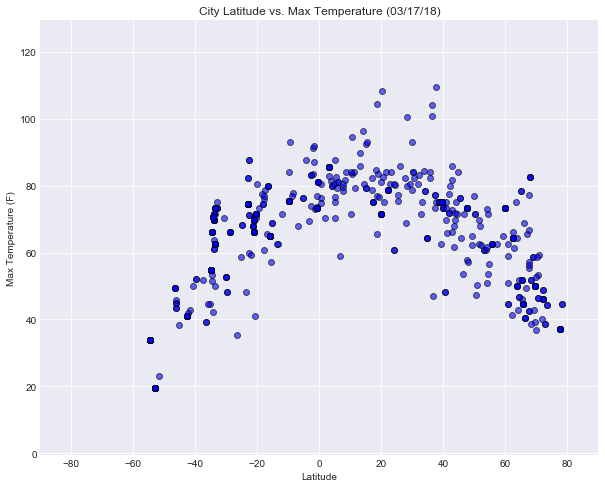

In [5]:
#Use the scatter function
#Draw Latitude vs Temperature Chart
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(CityWeather['Lat'], CityWeather['Max Temp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(CityWeather['Max Temp'])-20, max(CityWeather['Max Temp'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (03/17/18)")

# Save png images for each scatter plot.
plt.savefig("CityLat-MaxTemp-03.17.18.png")
plt.show()

<b>Humidity (%) vs. Latitude</b>

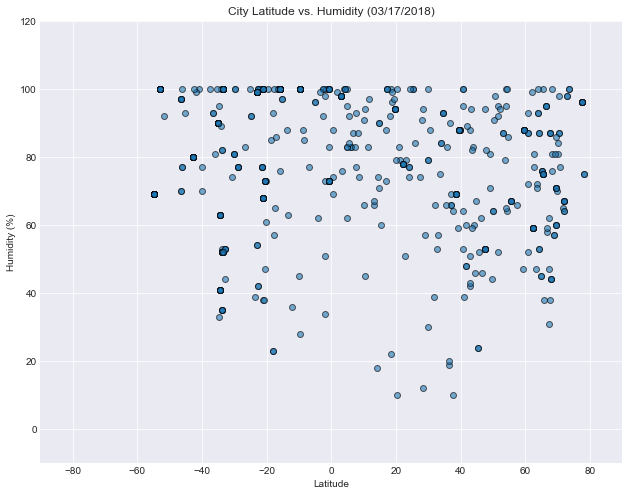

In [6]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Humidity', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Humidity (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Humidity'])-20, max(CityWeather['Humidity'])+20)))
plt.title("City Latitude vs. Humidity (03/17/2018)")

# Save png images for each scatter plot.
plt.savefig("CityLat-Humidity-03.17.18.png")
plt.show()

<b>Cloudiness (%) vs. Latitude</b>

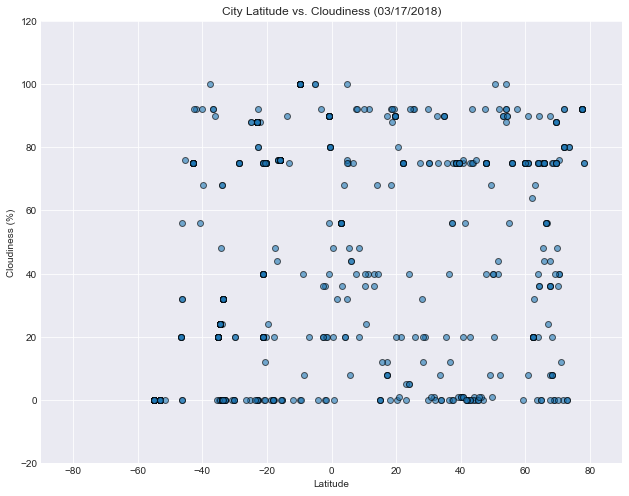

In [7]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Cloudiness', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Cloudiness (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Cloudiness'])-20, max(CityWeather['Cloudiness'])+20)))
plt.title("City Latitude vs. Cloudiness (03/17/2018)")

# Save png images for each scatter plot.
plt.savefig("CityLat-Cloudiness-03.17.18.png")
plt.show()

<b>Wind Speed (mph) vs. Latitude</b>

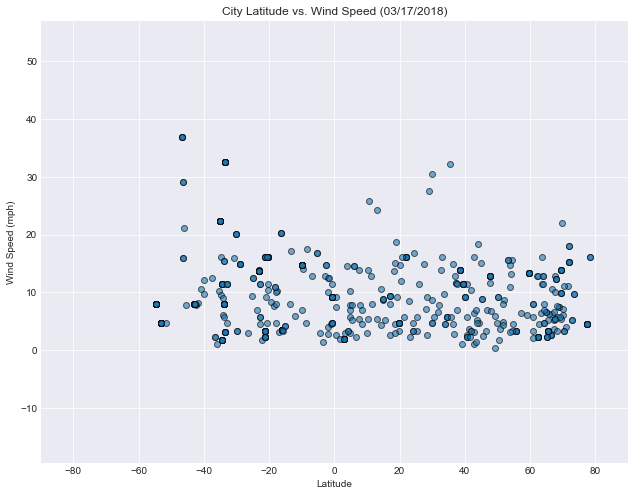

In [8]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Wind Speed', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Wind Speed (mph)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Wind Speed'])-20, max(CityWeather['Wind Speed'])+20)))
plt.title("City Latitude vs. Wind Speed (03/17/2018)")

# Save png images for each scatter plot.
plt.savefig("CityLat-WindSpeed-03.17.18.png")
plt.show()

<b>Analysis</b>
<p>Observed Trend 1: Although cities at Equator might not have the highest temperature, their temperatures remain high (around 80 F-Degree); North Sphere had more data when approaching the polar, this is due to the fact that there are barely any cities/countries existed passing the Antarctic Cirlcle (60ish degree) at the South Sphere. From the trend of "City Latitude vs. Max Temperature (07/20/18)" graph, the temperature climbs up when approaching from both side of the Polars to the Equator.</p>
<p>Observed Trend 2: From graph "City Latitude vs Humidity (07/20/18)", humidities varies among cities even at the same Latitude. There are more than just latitude affecting the humidity (i.e. geographic location). However, we did saw that the humidity among cities around equator retain relatively moderate-to-high-humidity (40%-100%). This could mainly cause by the constant hot weather around equator area.</p>
<p>Observed Trend 3: From graph "City Latitude vs Wind Speed (07/20/18)", The wind speeds for cities around Equator below 20mph. However, temperature (due to the constantly high temperature around Equator) is just one of the many factors that affecting the Wind Speed. Thus the correlation might seems a bit low.</p>